# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [37]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [38]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | al hamul
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | cadale
Processing Record 5 of Set 1 | ola
Processing Record 6 of Set 1 | pelabuhanratu
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | hohhot
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | kattivakkam
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | mata-utu
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | dampit
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | wanning
Processing Record 22 of Set 1 | fortaleza
Pr

In [39]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [40]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,al hamul,31.3115,31.1477,26.78,36,72,0.95,EG,1716096569
1,ushuaia,-54.8000,-68.3000,1.81,80,0,2.57,AR,1716096569
2,edinburgh of the seven seas,-37.0676,-12.3116,13.82,78,95,3.51,SH,1716096570
3,cadale,2.7603,46.3222,28.97,75,14,8.66,SO,1716096570
4,ola,59.5833,151.2833,12.30,60,99,12.60,RU,1716096570


In [41]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [42]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,al hamul,31.3115,31.1477,26.78,36,72,0.95,EG,1716096569
1,ushuaia,-54.8000,-68.3000,1.81,80,0,2.57,AR,1716096569
2,edinburgh of the seven seas,-37.0676,-12.3116,13.82,78,95,3.51,SH,1716096570
3,cadale,2.7603,46.3222,28.97,75,14,8.66,SO,1716096570
4,ola,59.5833,151.2833,12.30,60,99,12.60,RU,1716096570


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

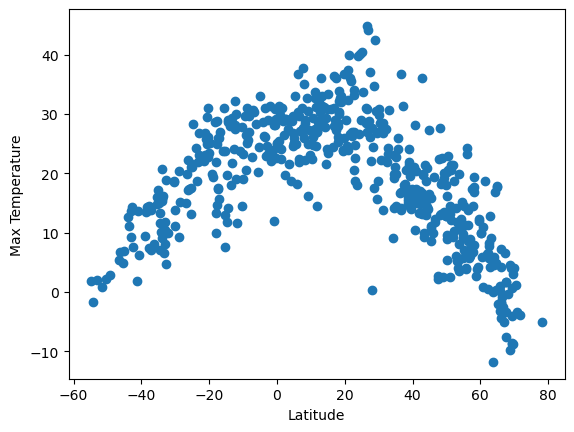

In [43]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

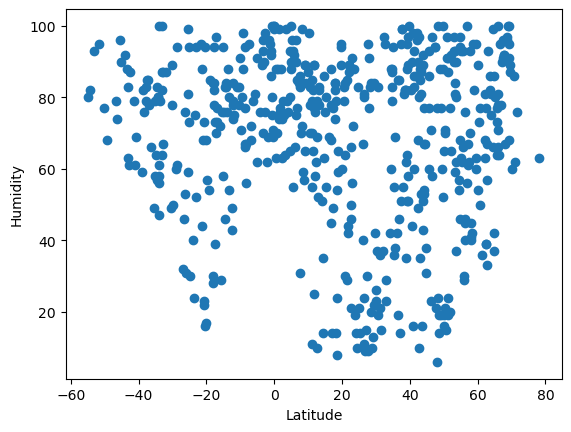

In [44]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

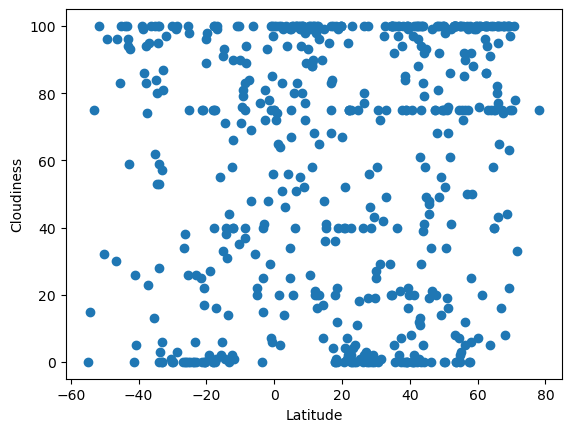

In [45]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

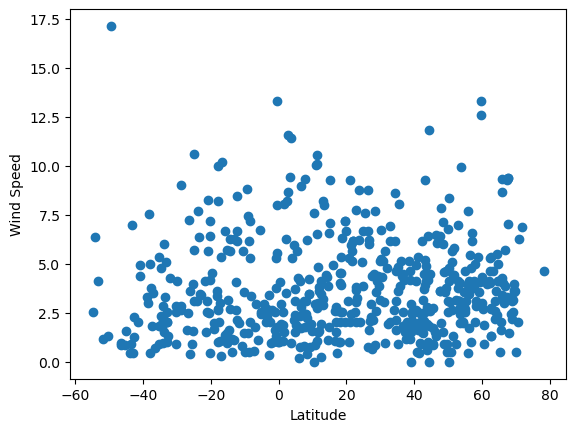

In [46]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x, y, labels):
    # get middle of graph for consistent equation display
    x_mid = (x.max() + x.min()) / 2
    y_mid = (y.max() + y.min()) / 2
    
    # linear regression calculation and use
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    regress_values = x * slope + intercept

    # plot creation and display
    plt.scatter(x, y)
    plt.plot(x, regress_values, 'r-')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.annotate(line_eq, (x_mid, y_mid), color="red", weight='bold', fontsize='16')
    plt.show()

    print(f"r-val of {round(rvalue, 2)}") # check r-value

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,al hamul,31.3115,31.1477,26.78,36,72,0.95,EG,1716096569
3,cadale,2.7603,46.3222,28.97,75,14,8.66,SO,1716096570
4,ola,59.5833,151.2833,12.30,60,99,12.60,RU,1716096570
8,hohhot,40.8106,111.6522,28.16,16,0,2.00,CN,1716096570
9,ust-nera,64.5667,143.2000,4.97,99,100,2.41,RU,1716096571


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,1.81,80,0,2.57,AR,1716096569
2,edinburgh of the seven seas,-37.0676,-12.3116,13.82,78,95,3.51,SH,1716096570
5,pelabuhanratu,-6.9875,106.5514,30.59,68,69,1.80,ID,1716096570
6,margaret river,-33.9500,115.0667,20.78,47,100,6.02,AU,1716096570
7,blackmans bay,-43.0167,147.3167,13.62,63,94,0.45,AU,1716096570


###  Temperature vs. Latitude Linear Regression Plot

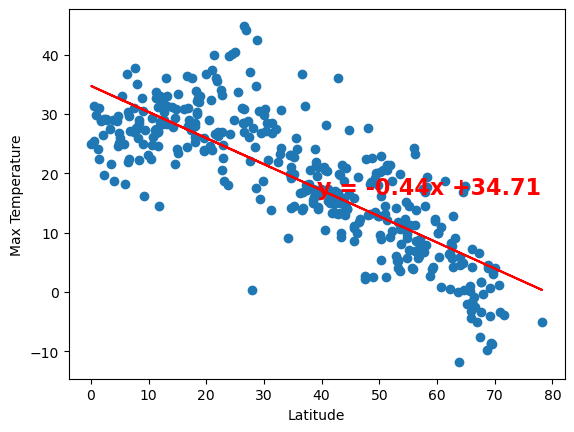

r-val of -0.8


In [50]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], ['Latitude', 'Max Temperature'])

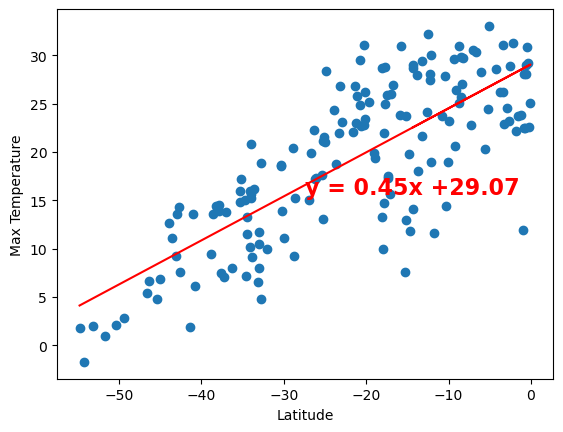

r-val of 0.78


In [51]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], ['Latitude', 'Max Temperature'])

**Discussion about the linear relationship:** Temperature appears to have a strong correlation with distance from the equator. On both graphs, latitude 0 has the greatest temperatures, with those values decreasing the farther away from the equator the city is located.

### Humidity vs. Latitude Linear Regression Plot

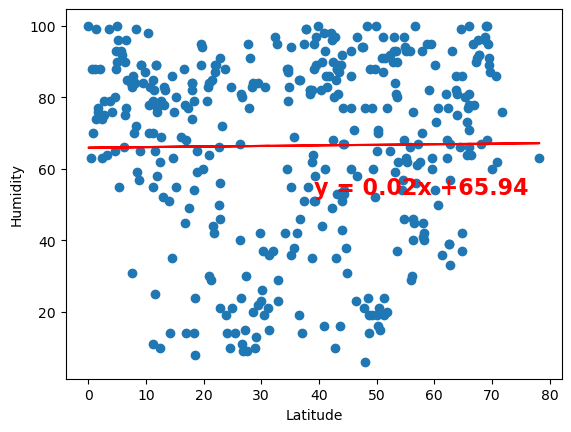

r-val of 0.01


In [52]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], ['Latitude', 'Humidity'])

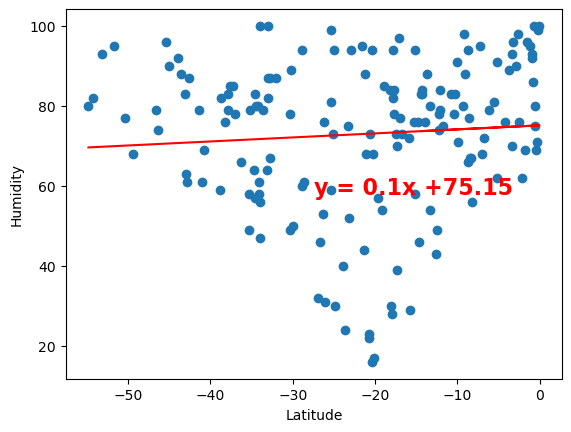

r-val of 0.07


In [53]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], ['Latitude', 'Humidity'])

**Discussion about the linear relationship:** There appears to be almost no correlation between humidity and latitude; the humidity seems independent from north-south location of a city.

### Cloudiness vs. Latitude Linear Regression Plot

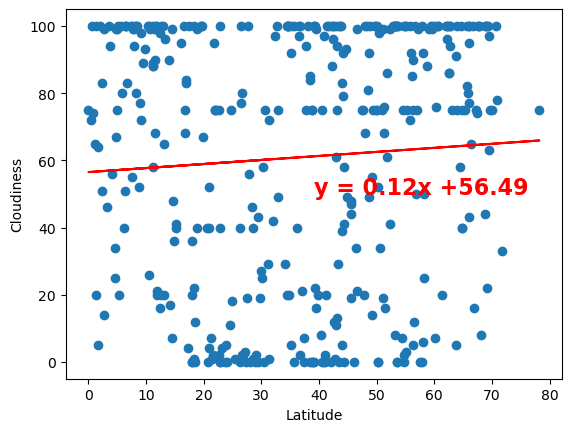

r-val of 0.06


In [54]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], ['Latitude', 'Cloudiness'])

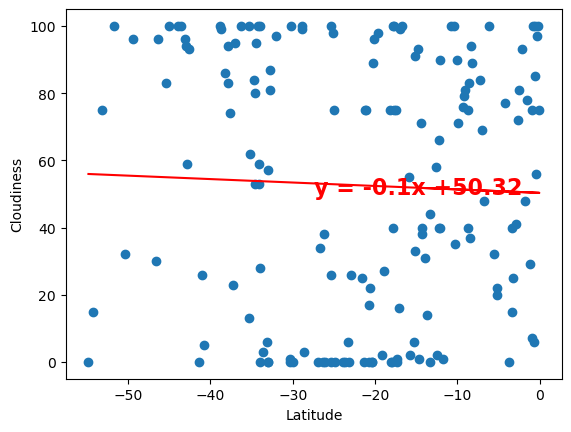

r-val of -0.04


In [55]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], ['Latitude', 'Cloudiness'])

**Discussion about the linear relationship:** There appears to be a low correlation between cloudiness and latitide, which is more prevalent in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

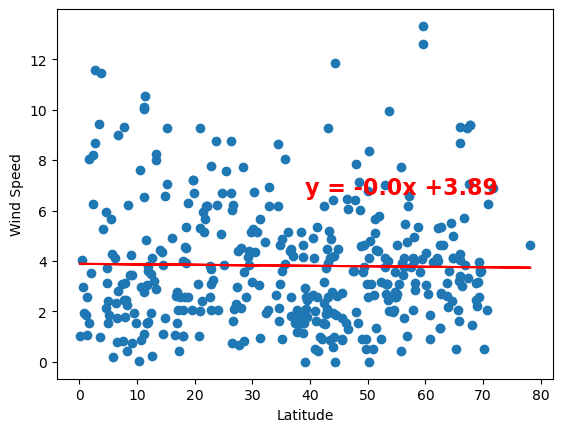

r-val of -0.02


In [56]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], ['Latitude', 'Wind Speed'])

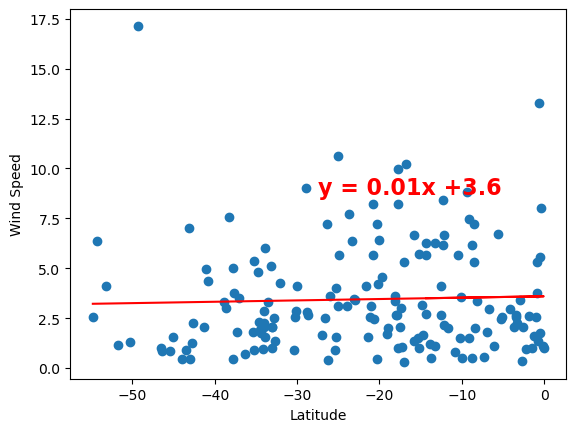

r-val of 0.04


In [57]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], ['Latitude', 'Wind Speed'])

**Discussion about the linear relationship:** Wind speed has no correlation with latitude; wind speed appears to vary evenly regardless of how far north-south a city is.